## Лабораторная работа №1
### Вариант 3
Выполнил Данилов Максим

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
# Сбор данных
# Загрузка данных о продажах автомобилей в США с 1970 по 2020 годы
# Источник данных: https://fred.stlouisfed.org/series/TOTALSA
data = pd.read_csv("data/Лабораторная работа 2/TOTALSA.csv", index_col="DATE", parse_dates=True)
# Преобразование данных в формат временных рядов
ts = data["TOTALSA"]
# Вывод первых пяти строк данных
ts.head()

DATE
1976-01-01    12.814
1976-02-01    13.340
1976-03-01    13.378
1976-04-01    13.223
1976-05-01    12.962
Name: TOTALSA, dtype: float64

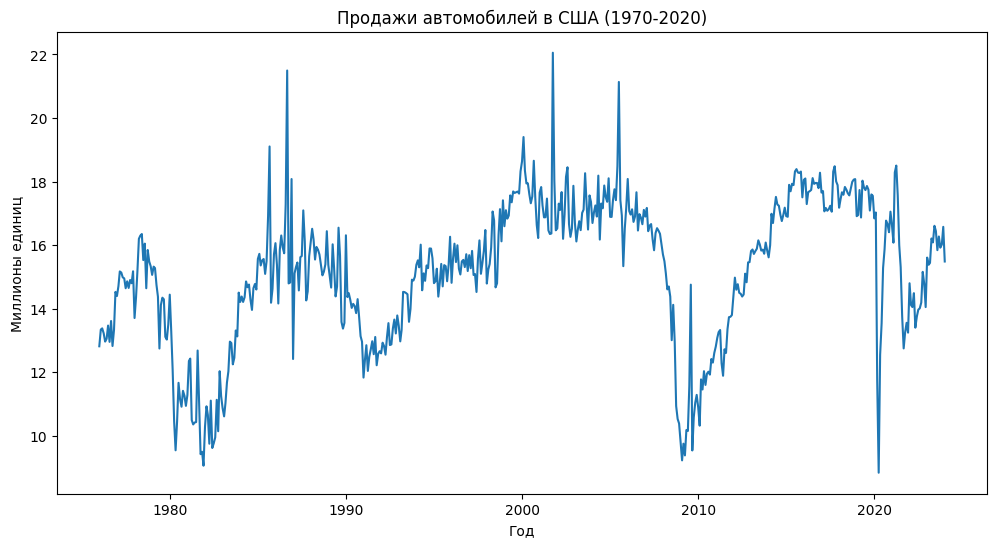

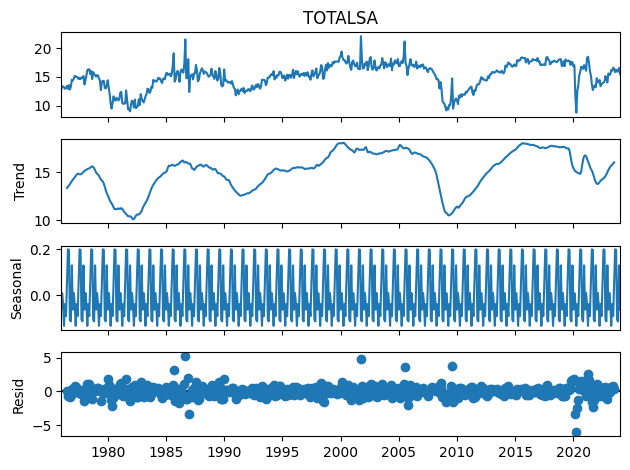

In [2]:
plt.figure(figsize=(12,6))
plt.plot(ts)
plt.title("Продажи автомобилей в США (1970-2020)")
plt.xlabel("Год")
plt.ylabel("Миллионы единиц")
plt.show()
# Выявление сезонных и трендовых компонент временных рядов
# Декомпозиция временного ряда с помощью аддитивной модели
decomposition = sm.tsa.seasonal_decompose(ts, model="additive")
# Вывод результатов декомпозиции
decomposition.plot()
plt.show()

In [3]:
# Выбор модели
# Выбор подходящей модели для прогнозирования спроса
# В данном случае используем модель SARIMA, так как временной ряд имеет сезонность и нестационарность
# Определение параметров модели с помощью автоматического подбора
# Используем функцию auto_arima из библиотеки pmdarima
from pmdarima import auto_arima
# Разделение данных на обучающую и тестовую выборки
# В качестве тестовой выборки используем последние 12 месяцев данных
train = ts[:-12]
test = ts[-12:]
# Подбор параметров модели SARIMA на обучающей выборке
# Указываем сезонный период равный 12 (месяцам в году)
# Указываем максимальные значения параметров p, d, q, P, D, Q равные 3
# Указываем критерий информационного качества AIC для выбора лучшей модели
model = auto_arima(train, seasonal=True, m=12, max_p=3, max_d=3, max_q=3,
max_P=3, max_D=3, max_Q=3, information_criterion="aic")
# Вывод параметров лучшей модели
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                  565
Model:             SARIMAX(0, 1, 2)x(0, 0, 2, 12)   Log Likelihood                -760.082
Date:                            Sat, 09 Mar 2024   AIC                           1530.164
Time:                                    14:21:10   BIC                           1551.839
Sample:                                01-01-1976   HQIC                          1538.624
                                     - 01-01-2023                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.3457      0.021    -16.814      0.000      -0.386      -0.305
ma.L2         -0.2086      0.043     -4.859      0.000      -0.293      -0.124
ma.S.L12       0.0561      0.029      1.953      0.051      -0.000       0.112
ma.S.L24      -0.0725      0.056     -1.300      0.194      -0.182       0.037
sigma2         0.8664      0.023     38.293      0.000       0.822       0.911
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              2014.95
Prob(Q):                              0.97   Prob(JB):                         0.00
Heteroskedasticity (H):               0.82   Skew:                            -0.58
Prob(H) (two-sided):                  0.16   Kurtosis:                        12.19
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [4]:
# Обучение модели
# Обучение выбранной модели на обучающей выборке
model.fit(train)
# Вывод параметров обученной модели
print(model.params())

ma.L1      -0.345663
ma.L2      -0.208623
ma.S.L12    0.056111
ma.S.L24   -0.072479
sigma2      0.866411
dtype: float64


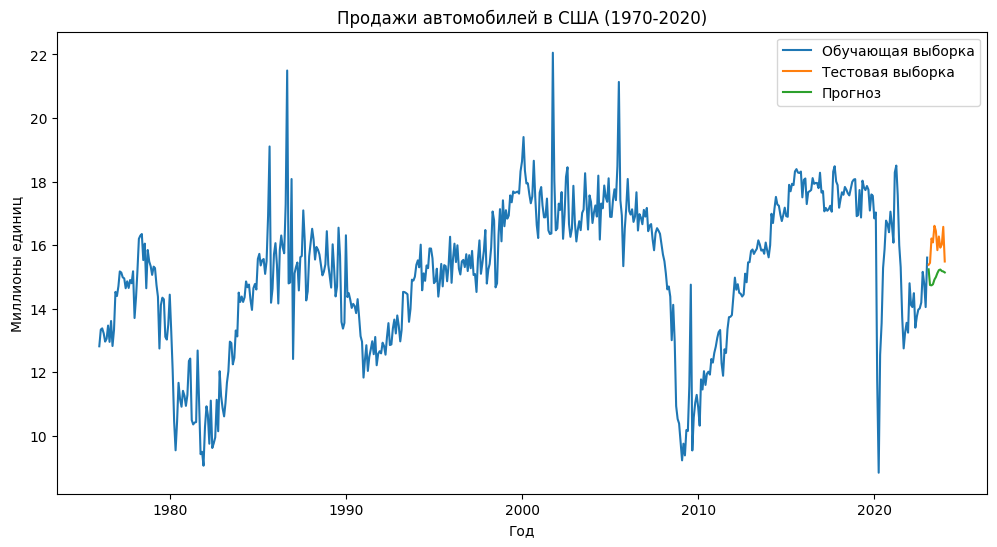

In [5]:
# Прогнозирование
# Создание прогнозов на будущий период на основе обученной модели
# Прогнозируем на 12 месяцев вперед (равно длине тестовой выборки)
forecast = model.predict(n_periods=12)
# Преобразование прогнозов в формат временных рядов
forecast = pd.Series(forecast, index=test.index)
# Визуализация прогнозов и фактических данных
plt.figure(figsize=(12,6))
plt.plot(train, label="Обучающая выборка")
plt.plot(test, label="Тестовая выборка")
plt.plot(forecast, label="Прогноз")
plt.title("Продажи автомобилей в США (1970-2020)")
plt.xlabel("Год")
plt.ylabel("Миллионы единиц")
plt.legend()
plt.show()

In [6]:
# Оценка качества модели
# Проверка точности прогнозов с помощью метрик
# Используем метрики MAE (средняя абсолютная ошибка) и RMSE (корень из среднеквадратичной ошибки)
from sklearn.metrics import mean_absolute_error, mean_squared_error
from math import sqrt
# Вычисление метрик на тестовой выборке
mae = mean_absolute_error(test, forecast)
rmse = sqrt(mean_squared_error(test, forecast))
# Вывод результатов оценки
print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")

MAE: 0.99
RMSE: 1.09


In [53]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_excel("data/Лабораторная работа 2/КАРТОФЕЛЬ (и общая таблица цен).xlsx", header = 2, parse_dates=True) # загрузка данных из файла Excel
df = df[df.columns[0:3]]
df = df.rename(columns={'Дата': 'Date'})
grouped = df.groupby(['Min', 'Max'])
df["Avg"] = (df['Min'] + df['Max'])/2
df = df.set_index('Date') # установка столбца с датами в качестве индекса

df.index = pd.DatetimeIndex(df.index).to_period('d')

df.head()

,Min,Max,Avg
Date,,,
2016-02-01,12,25,18.5
2016-02-03,12,25,18.5
2016-02-05,12,25,18.5
2016-02-08,12,25,18.5
2016-02-10,12,25,18.5


<Axes: xlabel='Date'>

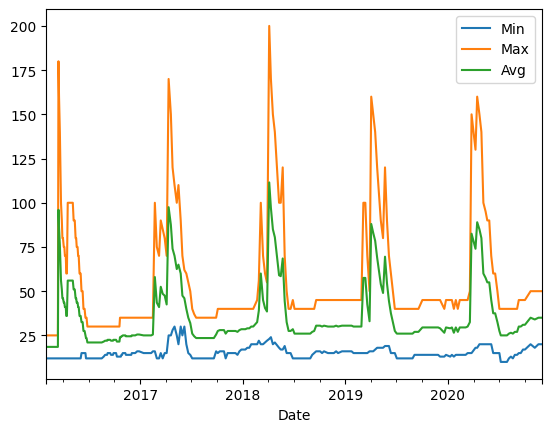

In [52]:
df.plot()

In [47]:
from statsmodels.tsa.holtwinters import HoltWintersResults, ExponentialSmoothing

In [60]:
model = ExponentialSmoothing(endog=df['Avg'], trend='add', seasonal='add').fit()

In [65]:
model.params_formatted

,name,param,optimized
smoothing_level,alpha,0.876068,True
smoothing_trend,beta,0.000522,True
smoothing_seasonal,gamma,0.000069,True
initial_level,l.0,17.211294,True
initial_trend,b.0,0.058747,True
initial_seasons.0,s.0,0.281719,True
initial_seasons.1,s.1,0.724006,True
initial_seasons.2,s.2,-1.380024,True
initial_seasons.3,s.3,-2.519910,True
initial_seasons.4,s.4,-3.058462,True


In [ ]:
for i in churn.select_dtypes(include='object').drop(columns = 'customerID').columns:
    print('')
    print(churn[i].value_counts())